In [2]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from matplotlib import rc

/work/shuhei-ky/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
exp_id = 'kitti_centernet-5'
arch = 'dladcnddu_34'
exp_dir = f'/work/shuhei-ky/exp/CenterNet/models/gmm/{exp_id}'

In [4]:
#logits_kitti = torch.load(f"{exp_dir}/logits_dladcnddu_34_kitti.pt").cpu()
#logits_weather_kitti = torch.load(f"{exp_dir}/logits_dladdu_34_weather_kitti.pt").cpu()
#logits_bdd = torch.load(f"{exp_dir}/logits_dladdu_34_bdd.pt").cpu()
#logits_coco = torch.load(f"{exp_dir}/logits_dladdu_34_coco.pt").cpu()

densities_kitti = torch.load(f"{exp_dir}/densities_{arch}_kitti.pt").reshape(-1, 100).cpu()
#densities_noise_kitti = torch.load(f"{exp_dir}/densities_{arch}_noise_kitti.pt").cpu()
#densities_weather_kitti = torch.load(f"{exp_dir}/densities_{arch}_weather_kitti.pt").cpu()
densities_coco = torch.load(f"{exp_dir}/densities_{arch}_coco.pt").reshape(-1, 100).cpu()

entropies_kitti = torch.load(f"{exp_dir}/entropies_{arch}_kitti.pt").reshape(-1, 100).cpu()
#entropies_noise_kitti = torch.load(f"{exp_dir}/entropies_{arch}_noise_kitti.pt").cpu()
#entropies_weather_kitti = torch.load(f"{exp_dir}/entropies_{arch}_weather_kitti.pt").cpu()
entropies_coco = torch.load(f"{exp_dir}/entropies_{arch}_coco.pt").reshape(-1, 100).cpu()

In [5]:
epistemic_uncertainties_kitti = torch.load(f"{exp_dir}/epistemic_uncertainties_{arch}_kitti.pt")
aleatoric_uncertainties_kitti = torch.load(f"{exp_dir}/aleatoric_uncertainties_{arch}_kitti.pt")
#epistemic_uncertainties_noise_kitti = torch.load(f"{exp_dir}/epistemic_uncertainties_{arch}_noise_kitti.pt")
#aleatoric_uncertainties_noise_kitti = torch.load(f"{exp_dir}/aleatoric_uncertainties_{arch}_noise_kitti.pt")
epistemic_uncertainties_coco = torch.load(f"{exp_dir}/epistemic_uncertainties_{arch}_coco.pt")
aleatoric_uncertainties_coco = torch.load(f"{exp_dir}/aleatoric_uncertainties_{arch}_coco.pt")

In [6]:
id_tp_indices_kitti = torch.load(f"{exp_dir}/id_tp_indices_kitti.pt")
ood_tp_indices_kitti = torch.load(f"{exp_dir}/ood_tp_indices_kitti.pt")
all_tp_indices_coco = torch.load(f"{exp_dir}/all_tp_indices_coco.pt")

In [7]:
for key in id_tp_indices_kitti.keys():
    results_images = id_tp_indices_kitti[key]
    for i, results_image in enumerate(results_images):
        if len(results_image) == 0:
            continue
        print(f"{key}, {i}:", results_image)

(0, 0, 0), 3: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 6: [{'gt': 4, 'dt': 1}]
(0, 0, 0), 14: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 23: [{'gt': 0, 'dt': 0}, {'gt': 1, 'dt': 1}]
(0, 0, 0), 27: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 34: [{'gt': 1, 'dt': 1}, {'gt': 6, 'dt': 3}]
(0, 0, 0), 56: [{'gt': 3, 'dt': 0}, {'gt': 10, 'dt': 2}, {'gt': 11, 'dt': 1}]
(0, 0, 0), 62: [{'gt': 1, 'dt': 0}]
(0, 0, 0), 66: [{'gt': 1, 'dt': 0}]
(0, 0, 0), 69: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 80: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 86: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 89: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 116: [{'gt': 4, 'dt': 0}, {'gt': 5, 'dt': 1}]
(0, 0, 0), 120: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 134: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 152: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 153: [{'gt': 0, 'dt': 0}]
(0, 0, 0), 156: [{'gt': 0, 'dt': 2}, {'gt': 1, 'dt': 0}, {'gt': 3, 'dt': 1}, {'gt': 4, 'dt': 3}, {'gt': 5, 'dt': 7}]
(0, 0, 0), 159: [{'gt': 0, 'dt': 2}, {'gt': 1, 'dt': 1}, {'gt': 2, 'dt': 0}, {'gt': 3, 'dt': 4}]
(0, 0, 0), 161: [{'gt': 6, 'dt': 

In [8]:
for key in ood_tp_indices_kitti.keys():
    results_images = ood_tp_indices_kitti[key]
    for i, results_image in enumerate(results_images):
        if len(results_image) == 0:
            continue
        print(f"{key}, {i}:", results_image)

(0, 0, 0), 6: [{'gt': 2, 'dt': 78}]
(0, 0, 0), 34: [{'gt': 5, 'dt': 71}]
(0, 0, 0), 65: [{'gt': 3, 'dt': 78}]
(0, 0, 0), 291: [{'gt': 4, 'dt': 75}]
(0, 0, 0), 487: [{'gt': 4, 'dt': 71}]
(0, 0, 0), 500: [{'gt': 1, 'dt': 71}]
(0, 0, 0), 539: [{'gt': 1, 'dt': 76}]
(0, 0, 0), 669: [{'gt': 1, 'dt': 70}]
(0, 0, 0), 793: [{'gt': 4, 'dt': 68}, {'gt': 5, 'dt': 67}]
(0, 0, 0), 884: [{'gt': 1, 'dt': 78}]
(0, 0, 0), 1018: [{'gt': 3, 'dt': 76}]
(0, 0, 0), 1156: [{'gt': 5, 'dt': 79}]
(0, 0, 0), 1160: [{'gt': 1, 'dt': 77}]
(0, 0, 0), 1397: [{'gt': 3, 'dt': 76}]
(0, 0, 0), 1466: [{'gt': 1, 'dt': 86}]
(0, 0, 0), 1562: [{'gt': 2, 'dt': 70}]
(0, 0, 0), 1692: [{'gt': 0, 'dt': 78}]
(0, 0, 0), 1836: [{'gt': 5, 'dt': 74}]
(0, 0, 0), 1871: [{'gt': 3, 'dt': 77}]
(0, 0, 0), 1883: [{'gt': 3, 'dt': 75}]
(0, 0, 0), 1988: [{'gt': 0, 'dt': 81}]
(0, 0, 0), 2001: [{'gt': 0, 'dt': 74}]
(0, 0, 0), 2015: [{'gt': 4, 'dt': 73}]
(0, 0, 0), 2036: [{'gt': 1, 'dt': 67}]
(0, 0, 0), 2259: [{'gt': 3, 'dt': 74}]
(0, 0, 0), 2372: [

In [9]:
for key in all_tp_indices_coco.keys():
    results_images = all_tp_indices_coco[key]
    for i, results_image in enumerate(results_images):
        if len(results_image) == 0:
            continue
        print(f"{key}, {i}:", results_image)

(3, 0, 0), 1247: [{'gt': 1, 'dt': 22}]
(3, 1, 0), 1247: [{'gt': 1, 'dt': 22}]
(3, 2, 0), 1247: [{'gt': 1, 'dt': 22}]
(16, 0, 0), 236: [{'gt': 0, 'dt': 16}]
(16, 1, 0), 236: [{'gt': 0, 'dt': 16}]
(16, 2, 0), 236: [{'gt': 0, 'dt': 16}]
(36, 0, 0), 681: [{'gt': 14, 'dt': 0}]
(36, 1, 0), 681: [{'gt': 14, 'dt': 0}]
(36, 2, 0), 681: [{'gt': 14, 'dt': 0}]


In [10]:
id_kitti_densities_dict, id_kitti_entropies_dict = {}, {}
ood_kitti_densities_dict, ood_kitti_entropies_dict = {}, {}
for l in range(3): # difficulties
    id_densities, ood_densities = [], []
    id_entropies, ood_entropies = [], []
    for m in range(3): # classes
        id_tp_indices = id_tp_indices_kitti[m, l, 0]
        ood_tp_indices = ood_tp_indices_kitti[m, l, 0]
        for img_id, id_dicts_img in enumerate(id_tp_indices):
            for d in id_dicts_img:
                if len(d) == 0:
                    continue
                gt = d['gt']
                dt = d['dt']
                id_densities.append(densities_kitti[img_id, dt])
                id_entropies.append(entropies_kitti[img_id, dt])
        for img_id, ood_dicts_img in enumerate(ood_tp_indices):
            for d in ood_dicts_img:
                if len(d) == 0:
                    break
                gt = d['gt']
                dt = d['dt']
                ood_densities.append(densities_kitti[img_id, dt])
                ood_entropies.append(entropies_kitti[img_id, dt])
    id_kitti_densities_dict[l] = id_densities
    id_kitti_entropies_dict[l] = id_entropies
    ood_kitti_densities_dict[l] = ood_densities
    ood_kitti_entropies_dict[l] = ood_entropies

In [11]:
ood_coco_densities_dict, ood_coco_entropies_dict = {}, {}
for l in range(3): # difficulties
    ood_densities = []
    ood_entropies = []
    for m in range(91): # classes
        key = (m, l, 0)
        if key not in all_tp_indices_coco.keys():
            continue
        ood_tp_indices = all_tp_indices_coco[m, l, 0]
        for img_id, id_dicts_img in enumerate(ood_tp_indices):
            for d in id_dicts_img:
                if len(d) == 0:
                    continue
                gt = d['gt']
                dt = d['dt']
                ood_densities.append(densities_coco[img_id, dt])
                ood_entropies.append(entropies_coco[img_id, dt])
    ood_coco_densities_dict[l] = ood_densities
    ood_coco_entropies_dict[l] = ood_entropies

In [12]:
ood_all_densities_dict = ood_kitti_densities_dict.copy()
ood_all_densities_dict[0].extend(ood_coco_densities_dict[0])
ood_all_densities_dict[1].extend(ood_coco_densities_dict[1])
ood_all_densities_dict[2].extend(ood_coco_densities_dict[2])

In [13]:
ood_all_entropies_dict = ood_kitti_entropies_dict.copy()
ood_all_entropies_dict[0].extend(ood_coco_entropies_dict[0])
ood_all_entropies_dict[1].extend(ood_coco_entropies_dict[1])
ood_all_entropies_dict[2].extend(ood_coco_entropies_dict[2])

In [14]:
from sklearn import metrics

def get_roc_auc_logits(uncertainties, ood_uncertainties, device, confidence=False):
    # In-distribution
    bin_labels = torch.zeros(uncertainties.shape[0]).to(device)
    in_scores = uncertainties

    # OOD
    bin_labels = torch.cat((bin_labels, torch.ones(ood_uncertainties.shape[0]).to(device)))

    if confidence:
        bin_labels = 1 - bin_labels
    ood_scores = ood_uncertainties  # entropy(ood_logits)
    scores = torch.cat((in_scores, ood_scores))

    fpr, tpr, thresholds = metrics.roc_curve(bin_labels.cpu().numpy(), scores.cpu().numpy())
    precision, recall, prc_thresholds = metrics.precision_recall_curve(bin_labels.cpu().numpy(), scores.cpu().numpy())
    auroc = metrics.roc_auc_score(bin_labels.cpu().numpy(), scores.cpu().numpy())
    auprc = metrics.average_precision_score(bin_labels.cpu().numpy(), scores.cpu().numpy())

    return (fpr, tpr, thresholds), (precision, recall, prc_thresholds), auroc, auprc

In [15]:
(fpr, tpr, thresholds), (precision, recall, prc_thresholds), auroc, auprc = get_roc_auc_logits(
    torch.cat([t.reshape(-1) for t in id_kitti_densities_dict[2]]), torch.cat([t.reshape(-1) for t in ood_all_densities_dict[2]]), 'cuda'
)

In [16]:
auroc

0.37981863050897213

In [17]:
(fpr, tpr, thresholds), (precision, recall, prc_thresholds), auroc, auprc = get_roc_auc_logits(
    torch.cat([t.reshape(-1) for t in id_kitti_entropies_dict[2]]), torch.cat([t.reshape(-1) for t in ood_all_entropies_dict[2]]), 'cuda'
)

In [18]:
auroc

0.5740450656245031

In [19]:
clrs = ['#1f77b4','#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']

sb.set_style('whitegrid')
sb.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})

rc('text', usetex=False)

In [20]:
def plot_density(densities1, densities2, binrange, separate_ID=False):
    clrs = ['#1f77b4','#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']
    sb.set_style('whitegrid')
    
    quantile_array = np.percentile(densities1, q=[80])
    print("quantile_array:", quantile_array)

    plt.figure(figsize=(2.5,2.5/1.6))
    plt.tight_layout()

    range = dict(bins=30, binrange=binrange, element="step", fill=True, alpha=0.5)
    kw_separate_id = dict(hue="category", multiple="stack",
                hue_order=[1, 0],
                palette=[sb.color_palette()[4], sb.color_palette()[0]]) if separate_ID else dict(color=sb.color_palette()[0])

    sb.histplot(densities1, **kw_separate_id,
                stat='probability', kde=False, **range, label="dummy", legend=False) # 'Dirty-MNIST (In-distribution)')
    sb.histplot(densities2, color=sb.color_palette()[1],
                stat='probability', kde=False, **range, label="dummy", legend=False) #, label='Fashion-MNIST (OoD)')


    plt.xlabel('Log Density', fontsize=12)
    plt.ylabel('Fraction', fontsize=12)
    
    return quantile_array[0]


def plot_entropy(entropies1, entropies2, binrange, separate_ID=False):
    common_kwargs = dict(stat='probability', kde=False, bins=12, binrange=binrange, label="dummy", legend=False, element="step", alpha=0.5)
    id_kwargs = dict(
              hue="category", multiple="stack", 
              palette=[sb.color_palette()[0], sb.color_palette()[4]]) if separate_ID else dict(color=sb.color_palette()[0]) 
    
    quantile_array = np.percentile(entropies1, q=[12])
    print("quantile_array:", quantile_array)

    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(2.5,2.5/1.6), gridspec_kw={'height_ratios': [1, 3]}, constrained_layout=True)
    fig.subplots_adjust(hspace=0.30)  # adjust space between axes

    for ax in axes:
        sb.histplot(entropies1, **id_kwargs,
                    **common_kwargs, ax=ax)
        sb.histplot(entropies2, color=sb.color_palette()[1],
                    **common_kwargs, ax=ax)

    axes[0].set_ylim(0.4, 1.2)  # outliers only
    axes[1].set_ylim(0, .05)  # most of the data

    axes[0].spines['bottom'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    axes[0].set_ylabel("")
    axes[1].set_ylabel("Fraction", fontsize=12)
    axes[1].set_xlabel("Entropy", fontsize=12)

    axes[1].yaxis.set_label_coords(-0.04, 0.5, fig.transFigure)

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    axes[0].plot([0, 1], [0, 0], transform=axes[0].transAxes, **kwargs)
    axes[1].plot([0, 1], [1, 1], transform=axes[1].transAxes, **kwargs)

    fig.set_size_inches(2.5,2.5/1.6)

    return quantile_array[0]


separate_ID = False

quantile_array: [77.10865173]


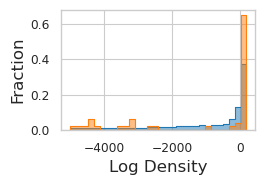

In [21]:
density_threshold = plot_density(torch.cat([t.reshape(-1) for t in id_kitti_densities_dict[2]]), torch.cat([t.reshape(-1) for t in ood_all_densities_dict[2]]), binrange=[-5000, 200], separate_ID=separate_ID)
plt.savefig(f'{exp_dir}/idooddensities_hist_kitti_vs_coco.png', bbox_inches='tight')

quantile_array: [1.00697217]


/tmp/ipykernel_2112167/1730782346.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.30)  # adjust space between axes


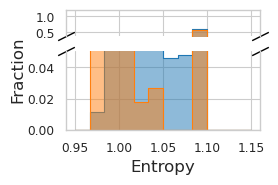

In [25]:
entropy_threshold = plot_entropy(torch.cat([t.reshape(-1) for t in id_kitti_entropies_dict[2]]), torch.cat([t.reshape(-1) for t in ood_all_entropies_dict[2]]), binrange=[0.95, 1.15], separate_ID=separate_ID)
plt.savefig(f'{exp_dir}/entropies_hist_kitti_vs_coco.png', bbox_inches='tight')